<a href="https://colab.research.google.com/github/AdamVinestock/Computer-Vision/blob/main/HarrisCornerDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span style="color:blue"> Computer Vision - Winter 2024

## <span style="color:blue"> Exercise 1 </span>
**Reichman University**

**Lecturer:** Prof. Yael Moses, RUNI

**TA:** Eyal Friedman, RUNI

**Submission date: 10.1.24** \
Note: In case you need an extension for any reason, you can submit it by 14.1.24. \
No extra extensions will be given.

**Your name: [Your Name]**
**Your ID: [Your ID]**

In this exercise, you will practice basic image operations such as loading, saving, and displaying an image, getting familiar with 'numpy,' and understanding the benefits of vectorized operations in Python. This exercise contains three parts:

1. Image Convolution.
2. Implementing a classic Harris corner Detector.
3. Answering questions.

## <span style="color:blue"> Submission guidelines:</span>

1. Your **zip** file should include the following files only:
   - ex1.ipynb
   - images you use
2. You should use Jupyter Notebook.
3. Name the zip file **'ex1_ID_ID.zip'** and **do not** include any additional directories.
4. Submit using *Moodle*.
5. Submit on time!
6. You can submit this assignment in pairs (no triplets).
   * In the case of pair submission, both IDs and names should be added to the notebook.
   * One should submit the homework, and the other should submit a simple text file named: ID_ID.txt and nothing else.
   *Please make sure that your collaborator submits the HW.

## Read the following instructions carefully:

1. Write **efficient vectorized** code. When you think you cannot use vectorized code, give a short explanation of why.
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests unless requested.
3. Use `Python 3` and `numpy 1.18.5` or above. Changes to the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden unless provided by us.
5. Your code must run without errors. Note, **Code that fails to run will not be graded.**
6. Document your code properly.
7. Go over Warmup Python - you can find relevant python functions that will make your life easier.


## Honor Code:
The assignment is a basic tool for learning the material. You can probably find the solution on the web (including ChatGPT), however, you will not learn what you should learn from it. In addition, since we give grades on the assignment, using existing solutions will be considered dishonest.
In particular, you are not allowed to copy or use any code that solve the tasks.
You are more than welcome to talk with your friends, but you are not allowed to give your code or answers and you are not allowed to use their code or answers.
Remember – you take this course in order to learn.

## I declair that I respcet the honor code:
<span style="color:red"> Add here your names:

Omer Wachman

Adam Wachman


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
import copy

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [ ]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.10.12
Numpy version:  1.23.5


## <span style="color:black">Section A: Convolution
In this part, you will need to write a function **convolvedImage = convolutionMask(img,mask)**  which gets a 2D np.array of a grey level image and a convolution mask (Kernel) and output the convolved image with your mask. It also should plot  the original image and the convolved image side by side. Use captions on each image that indicates what you present. (Hint: see example in Warmup Python in Moodle)\
You may use the convolve2d function from scipy.signal.\
**Note:** Make sure that you understand the differences between correlation and convolution.\
Suggest a convolution mask for each of the 4 cases:
    
1. Mask1:  a convolution mask (kernel)  that computes the average of a 5x5 pixels around each pixel.
   
    
2. Mask2:  a convolution mask (kernel) of size *5×5* such that the maximal value over all possible grey level images (range 0 to 255) will be obtained in the center of a widnow that contains a black  shape region surrounded by white pixels (see the region below).  Note, the rest of the image may contain any values.

    The shape region:
    
   ``  
      255 255 255 255 255
     255  0  255 255 255
     255  0   0   0  255
     255  0   0  255 255
     255 255 255 255 255
     ``

3. Let '*' be a don't care value.\
    Mask3:  a mask as defined in  2 above  but for the following region:
    
    ``  
    0    0     0    0    0
    0    *    255   *    0
    0   255   255  255  255
    0    *    255   0    0
    0    0     0    0    0
      ``
4. Maks 4: a convolution mask (kernel)  that computes a 3 pixel shift of the image to the right.\
    You can ignore the results along the border of the image.

**Submit your function below**.


In [ ]:
# This function will be part your functions' test - do not change it
# You may add any helper function for your implementation and to write your code in the cell below

def test_A(imageName):
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

    convolvedImage1 = convolutionMask(img,mask1)

    convolvedImage2 = convolutionMask(img,mask2)

    convolvedImage3 = convolutionMask(img,mask3)

    convolvedImage4 = convolutionMask(img,mask4)

In [ ]:
# For each call of the funtion, show on screen the result of your function.

def convolutionMask(img,mask):
    img_float = img.astype(np.float32) / 255.0  # Map uint8 to [0, 1]
    img_float = img_float * 2 - 1               # Map to [-1, 1]
    convolved_img = convolve2d(img_float, mask, mode='same', boundary='fill', fillvalue=0)
    convolved_img = (convolved_img + 1) / 2                                      # Convert back to [0, 1]
    convolved_img_uint8 = np.clip(convolved_img * 255, 0, 255).astype(np.uint8)  # Convert to [0, 255] and then to uint8

    # Create a figure with 2 subplots of the images side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(img, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    ax2.imshow(convolved_img_uint8, cmap='gray')
    ax2.set_title('Convolved Image')
    ax2.axis('off')
    plt.show()

In [ ]:
# Masks:
mask1 = np.ones((5,5))/25
mask2 = np.flipud(np.fliplr(np.array([
    [ 1,  1,  1,  1,  1],
    [ 1, -1,  1,  1,  1],
    [ 1, -1, -1, -1,  1],
    [ 1, -1, -1,  1,  1],
    [ 1,  1,  1,  1,  1]], dtype=np.float32)))  # Since we are searching for a specific pattern, we want to perform a sort of correlation. Therefore we perform a flip before feeding it to the convolution.

mask3 = np.flipud(np.fliplr(np.array([
    [-1, -1, -1, -1, -1],
    [-1, 0, 1, 0, -1],
    [-1, 1, 1, 1, 1],
    [-1, 0, 1, -1, -1],
    [-1, -1, -1, -1, -1]], dtype=np.float32)))

mask4 = np.zeros((1, 51))  # 3 pixels is hard to visually see, so we performed a 50 pixel shift
mask4[0, 50] = 1   # Since we use mode='same', we get an image the original size shifted to the right where the left strip is grayed out because 0 maped from [-1,1] to uint8 is gray

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# img = cv2.imread('/content/view0.tif', cv2.IMREAD_GRAYSCALE)

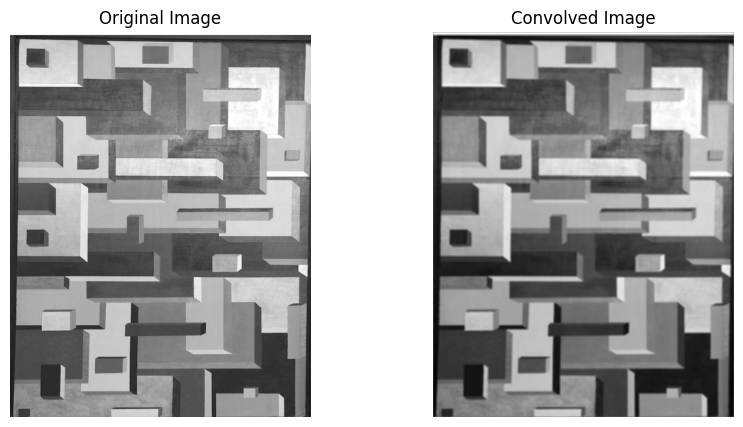

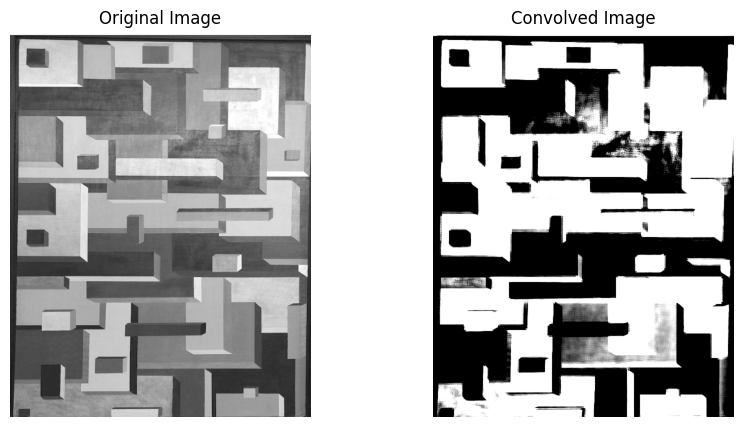

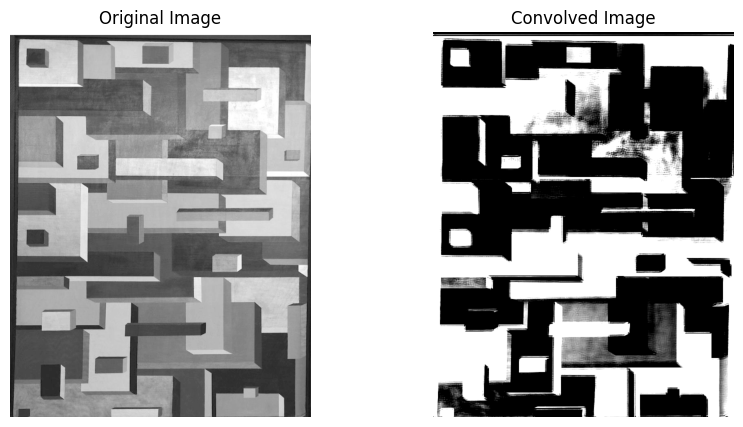

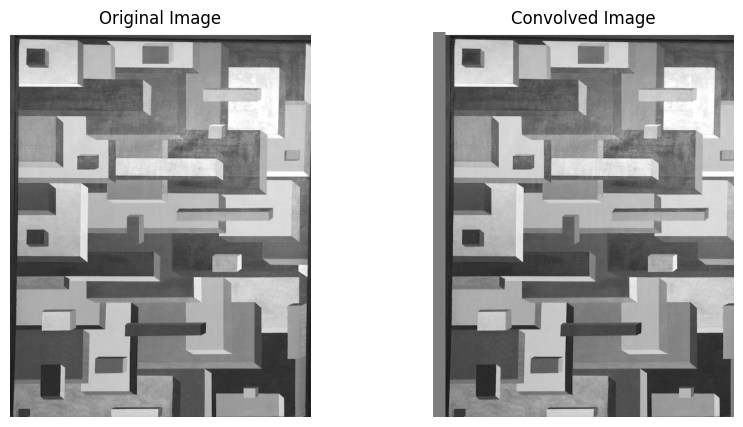

In [ ]:
# img = load your image here
test_A('/content/task_A.png')

# print and check your results - advicing you to check your code on trivial problems (toy problems)

## <span style="color:blue"> **Section B: Corner Detector**
    
In this section, you will implement the Harris corner detector as covered in class. Refer to the slides of the algorithm details.

Reference to the original paper: A COMBINED CORNER AND EDGE DETECTOR, Harris \& Stephens, Alvey Vision Conference, 1988

You will write the function:\
_Corners_ = H_corner(_im_, _σ _smooth_, _σ _neighb_, _th_, _density_size_, _display_).\
You may add additional parameters if necessary - list them and explain their role.

_im_: a grey-level image.\
_corners_: $k\times 2$ array that consists of the $x$ and $y$ coordinates of each of the $k$  detected corners.\
_display_: a binary parameter.\
Other parameters are described below.
    
    
## <span style="color:blue"> **B1 - Implement Harris**  
    
As part of the algorithm, you should implement the following:
    
1. Compute two kernels with the derivative of a Gaussian: **G_dx, G_dy  = Deriv_Gauss_xy(_sigma_)**.\
   **Note**:\
    (i) Refer to 'Warmup Python' for an example of defining a mask using a function. Modify the Gaussian example to a
    derivative of a Gaussian.\
    (ii) The mask_size should be around 6$\sigma_{smooth}$+1.
    You can check and see if smaller or larger mask size affect the results. You can also look at the plot of the mask. The values close to the border of the masks should be close to zero. On the other hans, the border containing these values are not too wide. Think what it means if this is not the case.\
   **A question for thought (not for submission)**: what is the expected sum of the elements in the kernel?
    
2. Using these masks compute two matrixes, $I_x$ and $I_y$, with the derivatives of the image in the $x$ and in the $y$ directions, respectively:\
    **Ix, Iy = Grad_xy(img,  $\sigma_{smooth}$)**
3. Compute the following three matrices: $I_x^2$, $I_y^2$,  $I_x$  and $I_y$.
4. Compute the four matrices, C11, C12, C22,  each corresponds to a different entry of the matrix for C for all pixels of the image. These matrices are computed by convolving the matrices computed in (3) with a Gaussian defined by $\sigma_{neighb}$.
4. Compute for each pixel, $q$ the eigen value and the eigen vector of its $C(q)$ matrix. Note that in this case you cannot perform it using vectorize operations.\
    or\
    Compute $d(q)= det(C)-k\cdot Trace(C)^2$.  For this case you will need an additional paramter $k$, but you can compute it efficiently using vectorize operations.
5. Threshold the small eignevalue of each pixel,  using the parameter $th$ (or do the same to $d(q)$).\
    Set to zero those pixles that are below the threshold.
6. For each region of size  denisty_size, leave the maximal small eigenvalue value (or smallest $d(q)$).

Return a list of corneres:  the indexes of the corners, and their strength.\
If display = 1, then display as part of the function (as in the class slides):\
a. The original image.\
b. The derivatives of the images, $I_x$ and $I_y$.
         (This is in addition to what is presented in the slides.)\
c. The values of the corner strength before appying the threshold. (Can be in greyscale rather than color. Make sure to normalize it for display.)\
d. The values of the corner strength after appying the threshold. (This should be a binary image.)\
e. The detected corners overlayed on the original image.




In [ ]:
# Compute two kernels with the derivative of a Gaussian: G_dx, G_dy = Deriv_Gauss_xy(sigma).
# From Warmup Python:

def Deriv_Gauss_xy(sig=1):

  kernel_size = 6 * sig + 1 # sig must be an integer
  x = np.linspace(-kernel_size/2, kernel_size/2, kernel_size) #array of x values
  y = np.linspace(-kernel_size/2, kernel_size/2, kernel_size) #array of y values
  x, y = np.meshgrid(x, y)  # Create a grid of points


  G_dx = (-x/(2*np.pi*sig**4))*np.exp(-(np.square(x) + np.square(y))/(2*sig**2))
  G_dy = (-y/(2*np.pi*sig**4))*np.exp(-(np.square(x) + np.square(y))/(2*sig**2))
  return G_dx , G_dy


In [ ]:
 #Using these masks compute two matrixes,  𝐼𝑥  and  𝐼𝑦 , with the derivatives of the image in the  𝑥  and in the  𝑦  directions, respectively: Ix, Iy = Grad_xy(img,  𝜎𝑠𝑚𝑜𝑜𝑡ℎ )

def Grad_xy(img,sig):
  G_dx ,G_dy = Deriv_Gauss_xy(sig)

  I_x = convolve2d(img,G_dx, mode='same', boundary='fill', fillvalue=0)
  I_y = convolve2d(img,G_dy, mode='same', boundary='fill', fillvalue=0)

  return I_x, I_y

In [ ]:
# Compute the following three matrices:  𝐼2𝑥 ,  𝐼2𝑦 ,  𝐼𝑥_𝐼𝑦 .

def Compute_Cq_components(I_x,I_y):
  I2_x = I_x * I_x # Elementwise multiplication
  I2_y = I_y * I_y # Elementwise multiplication
  I_x_y = I_y * I_x # Elementwise multiplication
  return I2_x, I2_y, I_x_y

In [ ]:
# Compute the four matrices, C11, C12, C22, each corresponds to a different entry of the matrix for C for all pixels of the image.
# These matrices are computed by convolving the matrices computed in (3) with a Gaussian defined by  𝜎𝑛𝑒𝑖𝑔ℎ𝑏 .


def Gaussian(sig):

    kernel_size = 6 * sig + 1 # sig must be an integer
    x = np.linspace(-kernel_size/2, kernel_size/2, kernel_size) #array of x values
    y = np.linspace(-kernel_size/2, kernel_size/2, kernel_size) #array of y values
    x, y = np.meshgrid(x, y)  # Create a grid of points

    return (1/(2*np.pi*sig**2))*np.exp(-(np.square(x) + np.square(y))/(2*sig**2))


def Compute_Cij(I2_x,I2_y,I_x_y,sig_neighb):


  G_neihb = Gaussian(sig_neighb)

  C11 = convolve2d(I2_x,G_neihb, mode='same', boundary='fill', fillvalue=0)
  C22 = convolve2d(I2_y,G_neihb, mode='same', boundary='fill', fillvalue=0)
  C12 = convolve2d(I_x_y,G_neihb, mode='same', boundary='fill', fillvalue=0)

  return C11, C12, C22

In [ ]:
# Compute for each pixel, 𝑞  the eigen value and the eigen vector of its  𝐶(𝑞)  matrix.
# Note that in this case you cannot perform it using vectorize operations.

def Compute_eigen_val_vec(C11, C12, C22):

  n_rows = C11.shape[0]
  n_columns = C11.shape[1]

  eigen_values_array = np.empty((n_rows,n_columns))
  eigen_vectors_array = np.empty((n_rows,n_columns,2,2))


  for i in range(n_rows):
    for j in range(n_columns):
      C_q = np.array([[C11[i,j], C12[i,j]],[C12[i,j], C22[i,j]]])
      eigenvalues, eigenvectors = np.linalg.eig(C_q)
      eigen_values_array[i,j] = min(eigenvalues)
      eigen_vectors_array[i,j] = eigenvectors

  return eigen_values_array, eigen_vectors_array

In [ ]:
# Threshold the small eignevalue of each pixel, using the parameter  𝑡ℎ
# Set to zero those pixles that are below the threshold.

def Compute_thresh(eigen_values_array, th, img):
  new_img = np.where(eigen_values_array < th,0,255)
  return new_img

In [ ]:
# For each region of size denisty_size, leave the maximal eigenvalue.

def non_maximum_suppression(img, eigen_values_array, density_size):
    height, width = img.shape
    diluted_corners_img = np.zeros_like(img)
    for y in range(0, height, density_size):
        for x in range(0, width, density_size):
            window = eigen_values_array[y:y+density_size, x:x+density_size]
            max_val = np.max(window)
            max_pos = np.unravel_index(np.argmax(window), window.shape)
            max_y, max_x = y + max_pos[0], x + max_pos[1]
            diluted_corners_img[max_y, max_x] = img[max_y, max_x]

    return diluted_corners_img

In [ ]:
def H_corner(img, sig_smooth, sig_neighb, th, density_size, display=1):

  I_x, I_y = Grad_xy(img,sig_smooth)
  I2_x, I2_y, I_x_y = Compute_Cq_components(I_x,I_y)
  C11, C12, C22 = Compute_Cij(I2_x,I2_y,I_x_y,sig_neighb)
  eigen_values_array, eigen_vectors_array = Compute_eigen_val_vec(C11, C12, C22)
  threshed_img = Compute_thresh(eigen_values_array, th, img)
  diluted_corners_img = non_maximum_suppression(threshed_img, eigen_values_array, density_size)

  overlayed_corners_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  corners = []
  for i in range(diluted_corners_img.shape[0]):
    for j in range(diluted_corners_img.shape[1]):
      if diluted_corners_img[i,j]>0:
        corners.append(((i,j),diluted_corners_img[i,j]))
        overlayed_corners_img = cv2.circle(overlayed_corners_img, (j, i), 5, (255, 0, 0), 1)

  if display == 0:
    return corners

  elif display == 1:
    eigen_min_val = np.min(eigen_values_array)
    eigen_max_val = np.max(eigen_values_array)
    normalized_eigen_values = (eigen_values_array - eigen_min_val) / (eigen_max_val - eigen_min_val) * 255 # Normalize eigan values to 0-255
    normalized_eigen_values = normalized_eigen_values.astype(np.uint8)

    fig, axs = plt.subplots(3, 2, figsize=(12, 18))

    axs[0, 0].imshow(img, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    axs[0, 1].imshow(I_x, cmap='gray')
    axs[0, 1].set_title('I_x')
    axs[0, 1].axis('off')

    axs[1, 0].imshow(I_y, cmap='gray')
    axs[1, 0].set_title('I_y')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(normalized_eigen_values, cmap='gray')
    axs[1, 1].set_title('Before corner threshold')
    axs[1, 1].axis('off')

    axs[2, 0].imshow(threshed_img, cmap='gray')
    axs[2, 0].set_title('After corner threshold')
    axs[2, 0].axis('off')

    axs[2, 1].imshow(overlayed_corners_img)
    axs[2, 1].set_title('Corners overlayed on original image')
    axs[2, 1].axis('off')

    plt.tight_layout()
    plt.show()

  elif  display == 2:
    print(f"sig_smooth: {sig_smooth}, sig_neighbor: {sig_neighb}, threshold: {th}, density_size: {density_size}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))
    ax1.imshow(img, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    ax2.imshow(overlayed_corners_img)
    ax2.set_title('Corners overlayed on original image')
    ax2.axis('off')
    plt.show()

  elif  display == 3:

    figsize=(12, 8)
    plt.imshow(overlayed_corners_img, cmap='gray')
    plt.title(f"sig_smooth: {sig_smooth}, sig_neighbor: {sig_neighb}, threshold: {th}, density_size: {density_size}")
    plt.axis('off')
    plt.show()

  elif display == 4:
    return overlayed_corners_img

In [ ]:
# For comparing the same image with different parameter values, we created the following function:

def H_corner_compare(img, sig_smooth1, sig_neighb1, th1, density_size1, sig_smooth2, sig_neighb2, th2, density_size2):

  I_x1, I_y1 = Grad_xy(img,sig_smooth1)
  I_x2, I_y2 = Grad_xy(img,sig_smooth2)
  I2_x1, I2_y1, I_x_y1 = Compute_Cq_components(I_x1,I_y1)
  I2_x2, I2_y2, I_x_y2 = Compute_Cq_components(I_x2,I_y2)
  C11_1, C12_1, C22_1 = Compute_Cij(I2_x1,I2_y1,I_x_y1,sig_neighb1)
  C11_2, C12_2, C22_2 = Compute_Cij(I2_x2,I2_y2,I_x_y2,sig_neighb2)
  eigen_values_array1, eigen_vectors_array1 = Compute_eigen_val_vec(C11_1, C12_1, C22_1)
  eigen_values_array2, eigen_vectors_array2 = Compute_eigen_val_vec(C11_2, C12_2, C22_2)
  threshed_img1 = Compute_thresh(eigen_values_array1, th1, img)
  threshed_img2 = Compute_thresh(eigen_values_array2, th2, img)
  diluted_corners_img1 = non_maximum_suppression(threshed_img1, eigen_values_array1, density_size1)
  diluted_corners_img2 = non_maximum_suppression(threshed_img2, eigen_values_array2, density_size2)

  overlayed_corners_img1 = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  overlayed_corners_img2 = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  corners1 = []
  corners2 = []
  for i in range(diluted_corners_img1.shape[0]):
    for j in range(diluted_corners_img1.shape[1]):
      if diluted_corners_img1[i,j]>0:
        corners1.append(((i,j),diluted_corners_img1[i,j]))
        overlayed_corners_img1 = cv2.circle(overlayed_corners_img1, (j, i), 5, (255, 0, 0), 1)

  for i in range(diluted_corners_img2.shape[0]):
    for j in range(diluted_corners_img2.shape[1]):
      if diluted_corners_img2[i,j]>0:
        corners2.append(((i,j),diluted_corners_img2[i,j]))
        overlayed_corners_img2 = cv2.circle(overlayed_corners_img2, (j, i), 5, (255, 0, 0), 1)

  eigen_min_val1 = np.min(eigen_values_array1)
  eigen_max_val1 = np.max(eigen_values_array1)
  eigen_min_val2 = np.min(eigen_values_array2)
  eigen_max_val2 = np.max(eigen_values_array2)
  normalized_eigen_values1 = (eigen_values_array1 - eigen_min_val1) / (eigen_max_val1 - eigen_min_val1) * 255 # Normalize eigan values to 0-255
  normalized_eigen_values1 = normalized_eigen_values1.astype(np.uint8)
  normalized_eigen_values2 = (eigen_values_array2 - eigen_min_val2) / (eigen_max_val2 - eigen_min_val2)
  normalized_eigen_values2 = normalized_eigen_values2.astype(np.uint8)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
  ax1.imshow(overlayed_corners_img1)
  ax1.set_title(f"sig_smooth1: {sig_smooth1}, sig_neighbor1: {sig_neighb1}, threshold1: {th1}, density_size1: {density_size1}",fontsize=8)
  ax1.axis('off')
  ax2.imshow(overlayed_corners_img2)
  ax2.set_title(f"sig_smooth2: {sig_smooth2}, sig_neighbor2: {sig_neighb2}, threshold2: {th2}, density_size2: {density_size2}",fontsize=8)
  ax2.axis('off')
  plt.show()

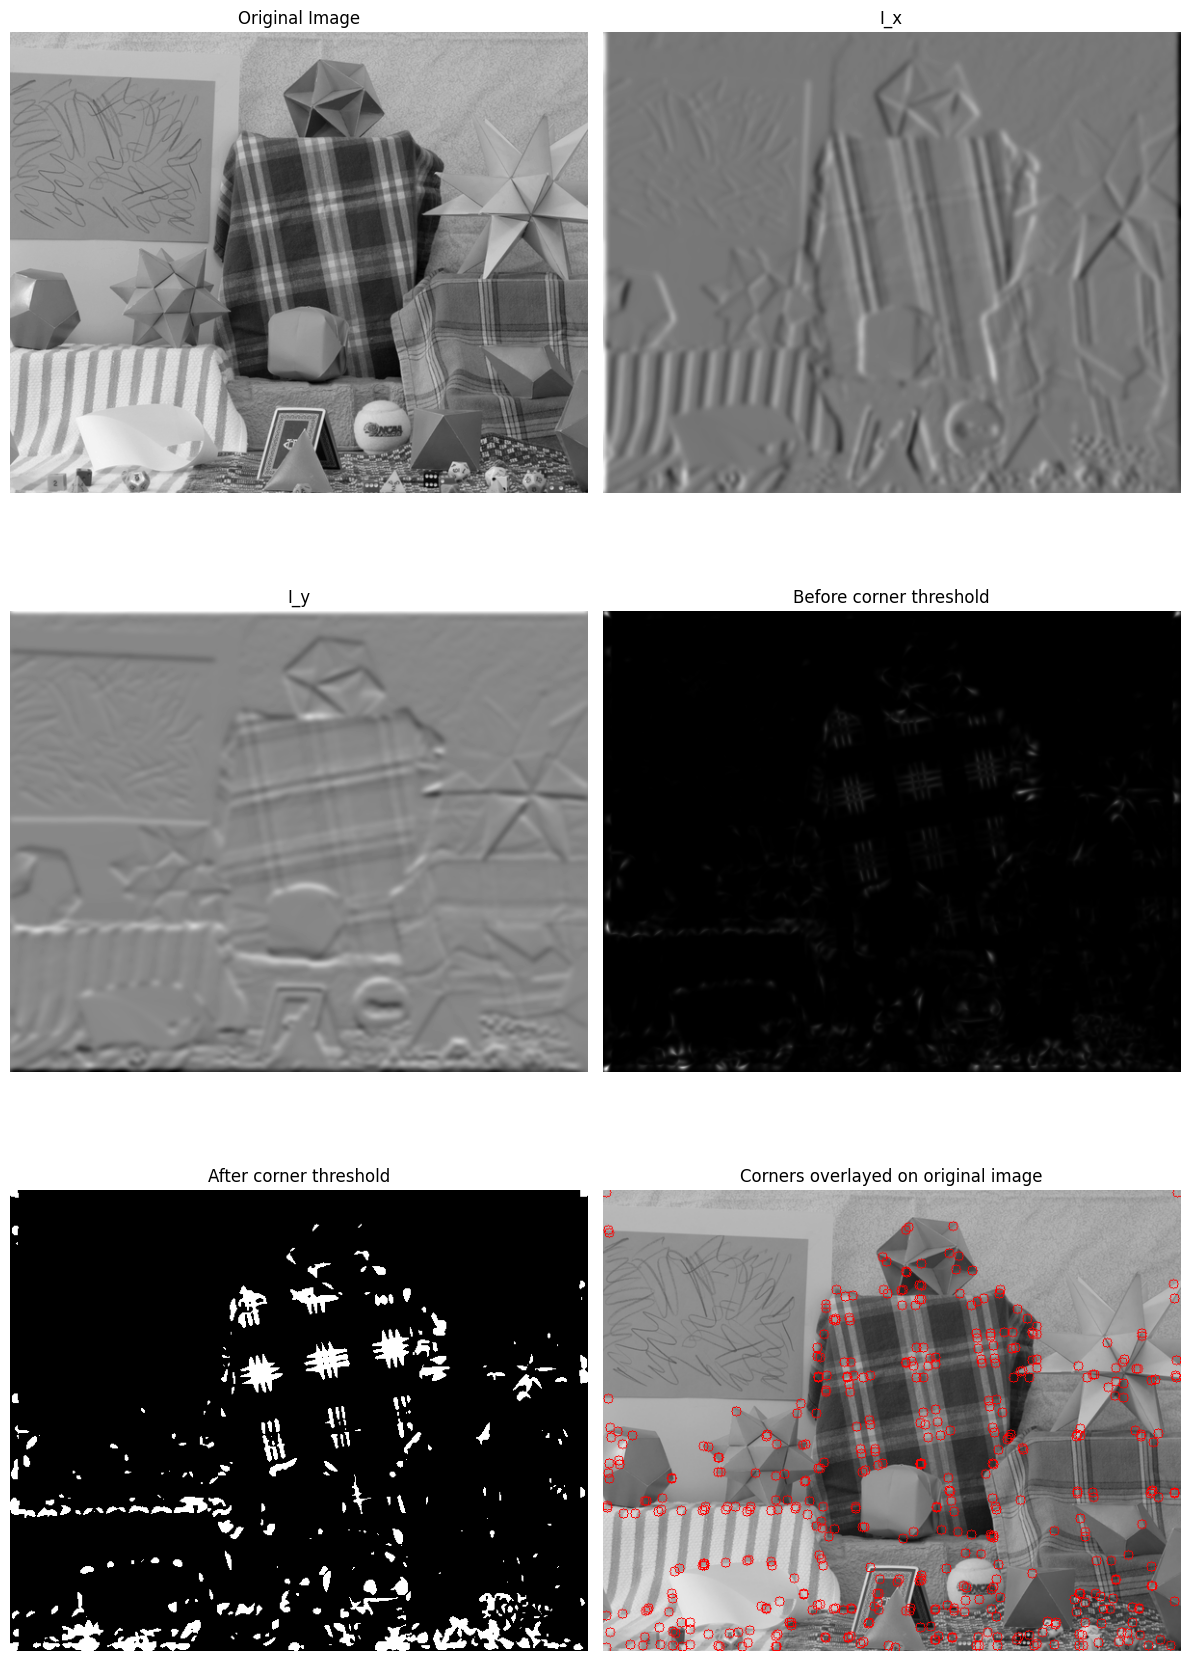

CPU times: user 13.8 s, sys: 657 ms, total: 14.5 s
Wall time: 14.2 s


In [ ]:
# testing Harris Corner Detector with display == 1:

%%time

view0 = cv2.imread('/content/view0.tif', cv2.IMREAD_GRAYSCALE)
Corners = H_corner(view0, sig_smooth = 3, sig_neighb=2, th=1.5, density_size=15, display=1)

## <span style="color:blue"> **B2 - Apply and explore**.
In this part you will apply your Harris corner detector and explore its parameters
Test:
1. Write a script that produces all the required tests.  
2. Suggest a synthetic image to test your algorithm, and present both the image and the results.
3. Test your functions on an image of your choice, exploring various parameters to achieve a 'good' result.\
    Display the results using different parameter values. Provide two images for each parameter to demonstrate its effect on the results. Use the 'title()' function to clarify which pair of parameters is used.
5. Summarize the effects of each parameter on corner detection in your answer.
6. Choose a set of parameters and apply the algorithm to the two images:  view0.tif and view6.tif.
Determine whether the same corners appear in both images. If not, mark an example of a corner that appears on one of the images and not on the other. Provide a possible explanation for why a corner was not found in the other image.
7. List the 3 most interesting things that you learned from this assignment.
8. What was the most non-trivial part of the assignent.

**Submit below as a text or as uploaded image of your text written in a different format**


In [ ]:
view0 = cv2.imread('/content/view0.tif', cv2.IMREAD_GRAYSCALE)
view6 = cv2.imread('/content/view6.tif', cv2.IMREAD_GRAYSCALE)
synthetic_img =  cv2.imread('/content/synthetic_img.png', cv2.IMREAD_GRAYSCALE)
test_img = cv2.imread('/content/test_img.jpeg', cv2.IMREAD_GRAYSCALE)


sig_smooth: 1, sig_neighbor: 1, threshold: 5, density_size: 50


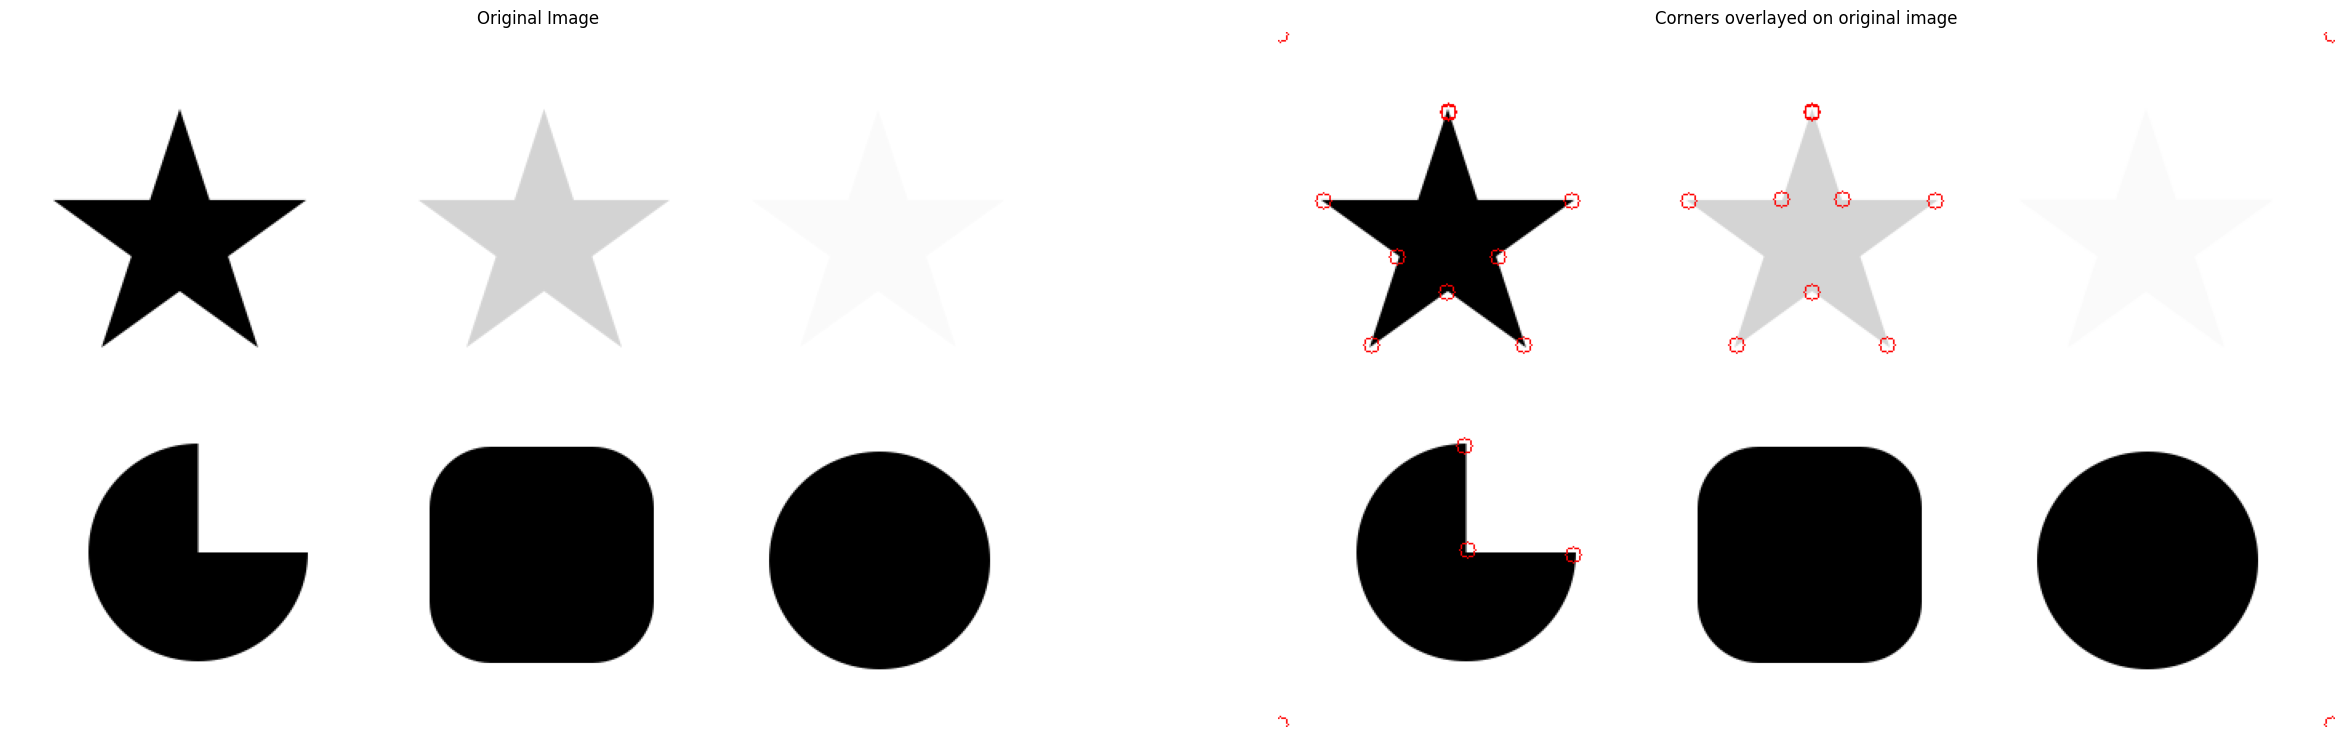

In [ ]:
# Suggest a synthetic image to test your algorithm, and present both the image and the results:

Corners = H_corner(synthetic_img, sig_smooth = 1, sig_neighb=1, th=5, density_size=50, display=2)

**Testing Sigma Smooth:**

By increasing the sigma smooth parameter, the Harris corner detector becomes less sensitive to detecting “false positive” corners. The smoothing helps in reducing the noise level within the picture. Another point that is apparent in our results, is that by smoothing the image to a certain level, the algorithm could “merge” two distinct corners into one because the smoothing operation averages the features of these corners. In total, by smoothing the image, the algorithm detects fewer corners.



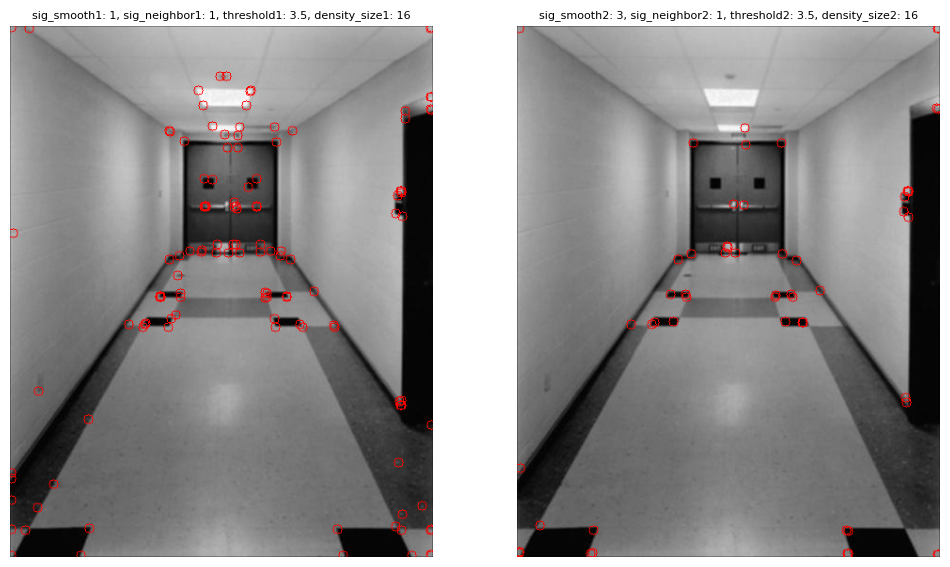

In [ ]:
# Testing sig_smooth:


Corners =  H_corner_compare(test_img, sig_smooth1 = 1, sig_neighb1 = 1, th1 = 3.5, density_size1=16,
                                       sig_smooth2 = 3, sig_neighb2 = 1, th2 = 3.5, density_size2=16)

**Testing Sigma Neighbors:**

By increasing this parameter, the algorithm considers a larger neighborhood around each pixel to determine if it is a corner. By doing so, in the detection process, the algorithm "is looking" at braoder area when deciding whether a pixel is a corner or not. That is, parts of the image that are not corners, such as arcs, could be considered to be corners. In this specific example, by incresing the sigma neighbor, more corners are detected.

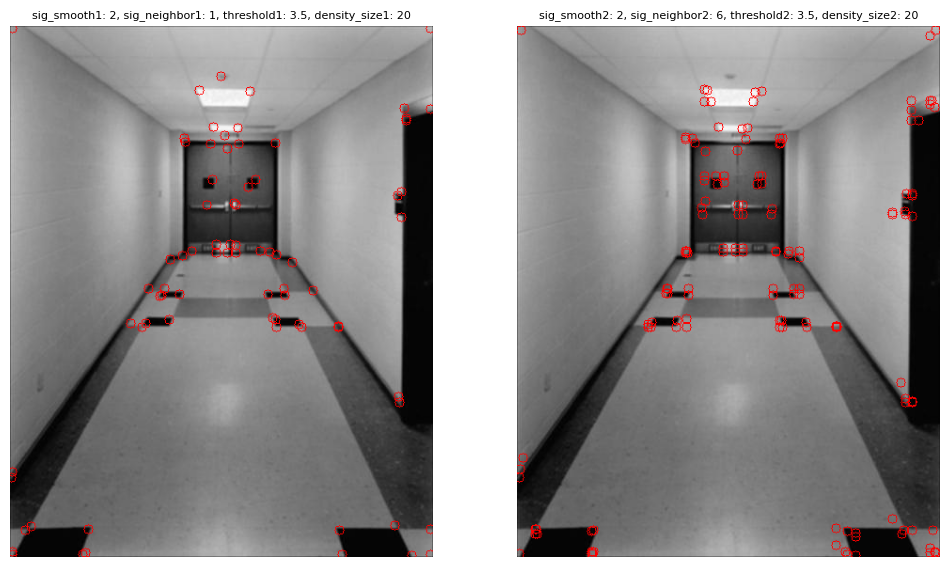

In [ ]:
# Testing sig_neighbor:

Corners =  H_corner_compare(test_img, sig_smooth1 = 2, sig_neighb1 = 1, th1 = 3.5, density_size1=20,
                                       sig_smooth2 = 2, sig_neighb2 = 6, th2 = 3.5, density_size2=20)

**Testing Threshold:**

This parameter sets a cutoff value for the corner response function calculated by the algorithm. Lower thresholds include more potential corner points which can increase the number of false positives. Higher thresholds, meanwhile, result in the detection of only those corners with a strong corner response, potentially missing subtler but valid corners.


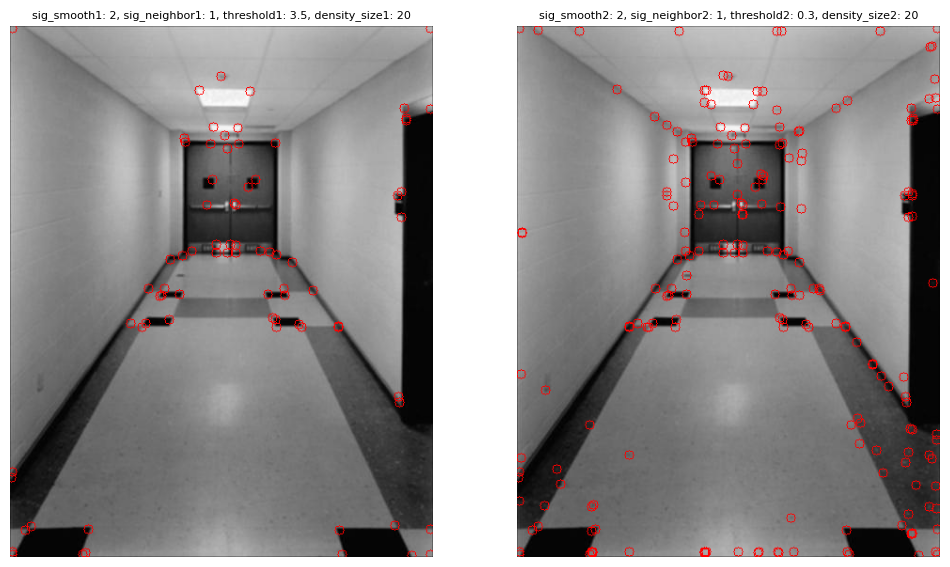

In [ ]:
# Testing treshold:

Corners =  H_corner_compare(test_img, sig_smooth1 = 2, sig_neighb1 = 1, th1 = 3.5, density_size1=20,
                                       sig_smooth2 = 2, sig_neighb2 = 1, th2 = 0.3, density_size2=20)

**Testing Density Size:**

A larger density size ensures that the detected corners are more spread out, avoiding the clustering of corner points in highly textured areas. This can be beneficial in ensuring that the corners detected are representative of distinct features in the image. A smaller density size allows for closer proximity of detected corners, which can be useful in highly detailed images where important features are densely packed. However, this can also lead to a large number of detected corners in textured regions, which might not all be relevant for the application.
It is important to note that due to how the density size is implemented, it is still possible for two adjacent corners to be chosen because they both have the maximum response within two adjacent “sliding windows”.

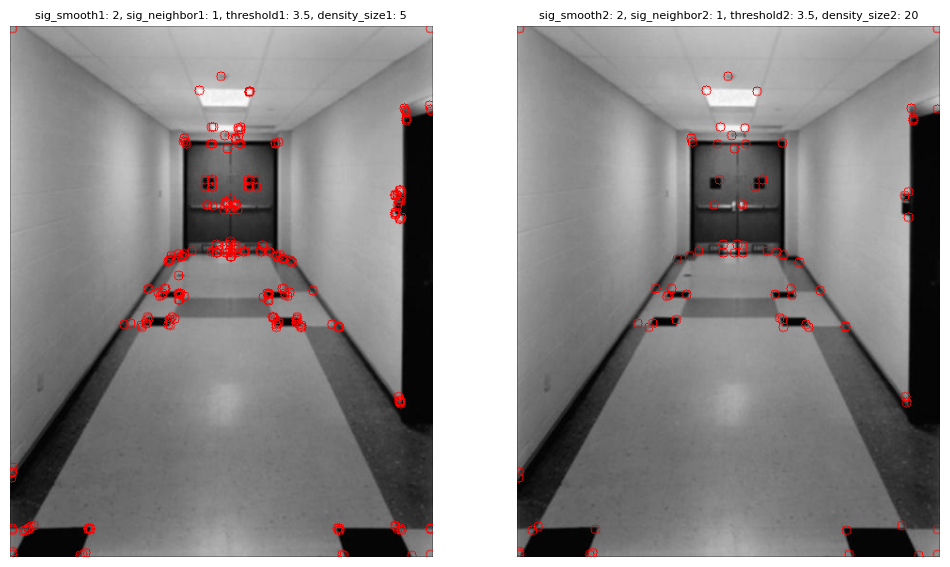

In [ ]:
# Testing density_size:

Corners =  H_corner_compare(test_img, sig_smooth1 = 2, sig_neighb1 = 1, th1 = 3.5, density_size1=5,
                                       sig_smooth2 = 2, sig_neighb2 = 1, th2 = 3.5, density_size2=20)

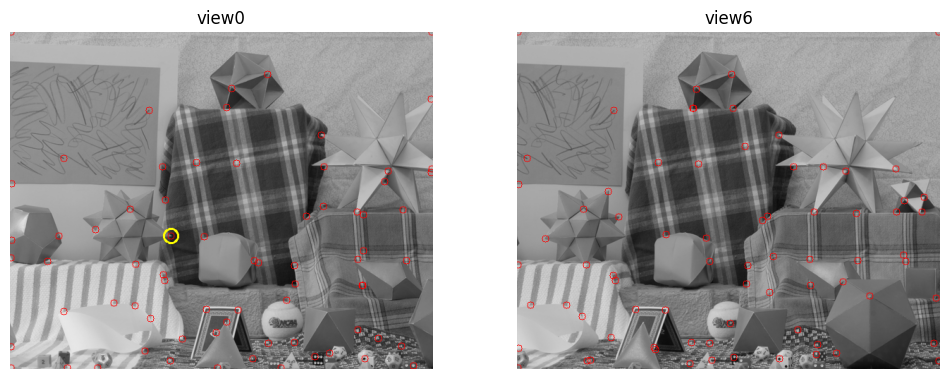

In [ ]:
# Choose a set of parameters and apply the algorithm to the two images: view0.tif and view6.tif.
# Determine whether the same corners appear in both images.
# If not, mark an example of a corner that appears on one of the images and not on the other.
# Provide a possible explanation for why a corner was not found in the other image.

overlayed_corners_view0 = H_corner(view0, sig_smooth = 1, sig_neighb=1, th=15, density_size=50, display=4)
overlayed_corners_view6 = H_corner(view6, sig_smooth = 1, sig_neighb=1, th=15, density_size=50, display=4)
overlayed_corners_view0 = cv2.circle(overlayed_corners_view0, (228, 290), 10, (255, 255, 0), 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.imshow(overlayed_corners_view0)
ax1.set_title(f"view0",fontsize=12)
ax1.axis('off')
ax2.imshow(overlayed_corners_view6)
ax2.set_title(f"view6",fontsize=12)
ax2.axis('off')
plt.show()


5. Differences in corner detection between view0 and view6 arise from the varying angles at which the images were captured. For instance, we marked a corner in yellow  that is detectable in view0 but not in view6. This discrepancy is due to view6 being taken from a right-shifted angle,  providing a less contrastive background for that specific corner of the origami.



  6.

  a. The resolution of an image greatly influences its processing time even in a simple straight forward algorithm such as harris corner detection. We observed in our example that reducing the number of pixels through cropping a zoomed-out screenshot was crucial for running faster experimentations. This of course is due to non vector based processing (we have some nested loops in the code).

  b. Smoothing in Synthetic vs Real-World Images - while analysis on synthetic images benefitted from minimal smoothing, allowing for the detection of even faint corners, it became clear that smoothing is essential for real-world images to mitigate noise and enhance feature detectability.

  c. Practical Application of Theoretical Concepts - many of the methods and ideas were clear to us but implementation proved to be crucial. A notable instance was in Section A2, where we recognized the necessity for a correlation kernel to maximize a specific patch. However, dealing with images in uint8 format posed a challenge as it doesn't support negative values in arithmetic operations. This led us to adapt by mapping the images to a different representation for effective processing.



7. A notably non-trivial aspect of the assignment was the significance of hyperparameters, especially sigma_neighbor. Fine-tuning this parameter revealed its capability to classify even the edges of a perfect circle as corners, highlighting the critical importance of tailored hyperparameter adjustment for each unique scenario.